 # Exercise 4.10 Instacart Grocery Basket Analysis Project (Additional Visualizations)

# 01. Importing libraries

In [2]:
# Import the libraries

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data

In [4]:
# Create a file path

path = r'/Users/vijaykasturi/Library/CloudStorage/OneDrive-Personal/Data Analytics Course - CareerFoundry/Data Immersion/A4/Instacart Basket Analysis'

In [60]:
# Import the merged file created in Part 1 from Prepared Data folder

df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_project_dataset_4.10.pkl'))

In [62]:
df_merged.rename(columns = {'prices' : 'Total Expenditure'}, inplace = True)
df_merged.rename(columns = {'days_since_prior_order' : 'Order Frequency'}, inplace = True)

df_merged.dtypes

user_id                    object
Gender                     object
STATE                      object
Age                         int64
No of Dependents            int64
Marital Status             object
Annual Income               int64
Unnamed: 0_x                int64
order_id                   object
order_number                int64
orders_day_of_week          int64
order_hour_of_day           int64
Order Frequency           float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
old_merge_ind            category
Unnamed: 0_y                int64
product_name               object
aisle_id                    int64
department_id               int64
Total Expenditure         float64
old_merge_ind_2          category
price_range_loc            object
busiest_day                object
daily_traffic_label        object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
avg_price     

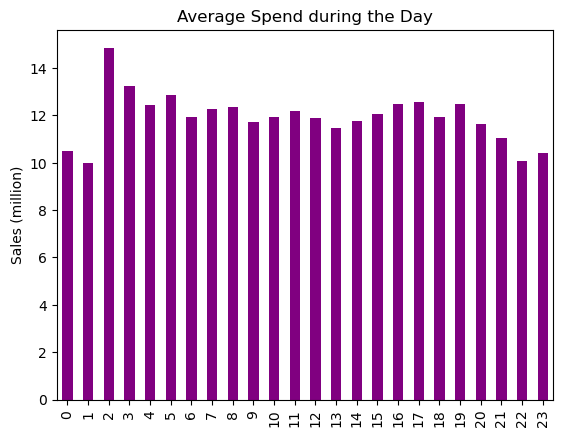

In [64]:
# 1. Highest Spend by hours of the day

Spend_Hours = df_merged.groupby('order_hour_of_day')['Total Expenditure'].mean()

Hist_Spend_Hours = Spend_Hours.plot.bar(color = 'purple')
plt.title('Average Spend during the Day')
plt.xlabel(None)
plt.ylabel('Sales (million)')

Hist_Spend_Hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Hist_Spending_Hours.png'))

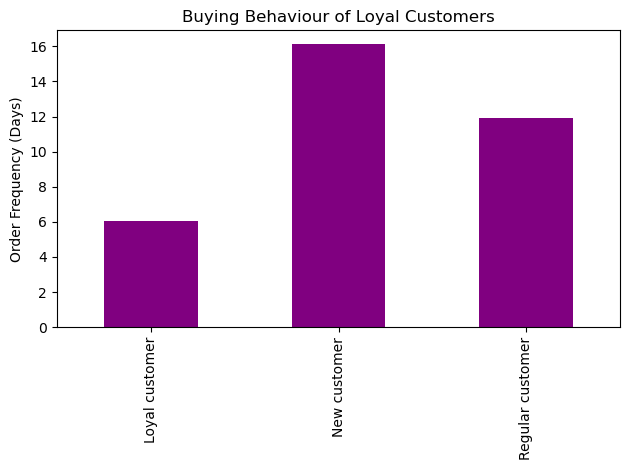

In [66]:
# 2. Brand Loyalty & Order Frequency

Loyal = df_merged.groupby('loyalty_flag').agg({'Order Frequency':['mean']})

Bar_Loyal = Loyal.plot.bar(color = 'purple', legend = False)
plt.title('Buying Behaviour of Loyal Customers')
plt.xlabel(None)
plt.ylabel('Order Frequency (Days)')
plt.tight_layout()
plt.show()

Bar_Loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar_Loyal.png'))

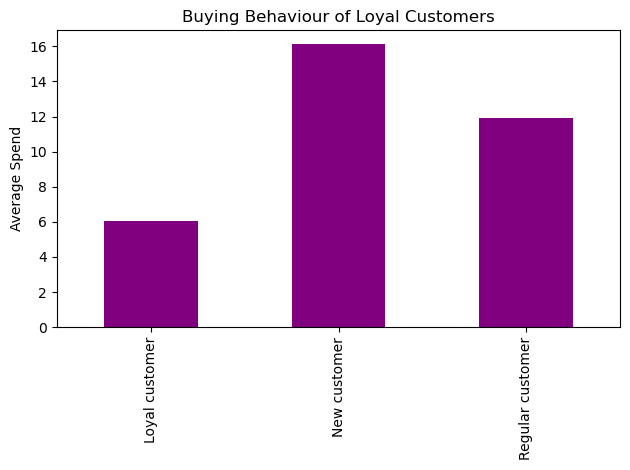

In [68]:
Loyal2 = df_merged.groupby('loyalty_flag').agg({'Total Expenditure':['mean']})

Bar_Loyal2 = Loyal.plot.bar(color = 'purple', legend = False)
plt.title('Buying Behaviour of Loyal Customers')
plt.xlabel(None)
plt.ylabel('Average Spend')
plt.tight_layout()
plt.show()

Bar_Loyal2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar_Loyal2.png'))

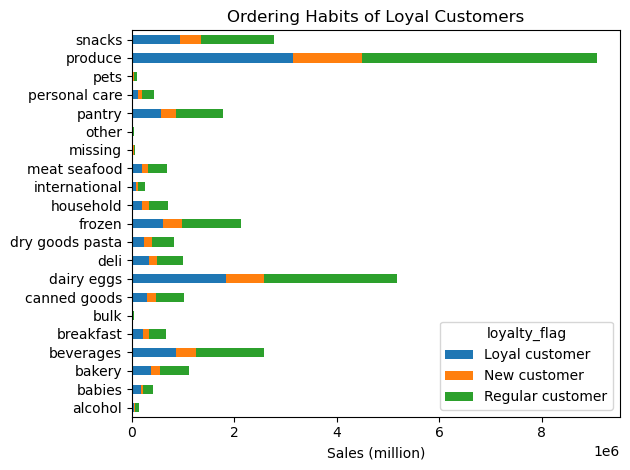

In [74]:
dept_loyal = pd.crosstab(df_merged['department'],df_merged['loyalty_flag'],dropna = True)

StBar_Dept_Loyal = dept_loyal.plot.barh(stacked =True)

plt.title('Ordering Habits of Loyal Customers')
plt.ylabel(None)
plt.xlabel('Sales (million)')
plt.tight_layout()
plt.show()

StBar_Dept_Loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'StBar_Department_Loyalty.png'))

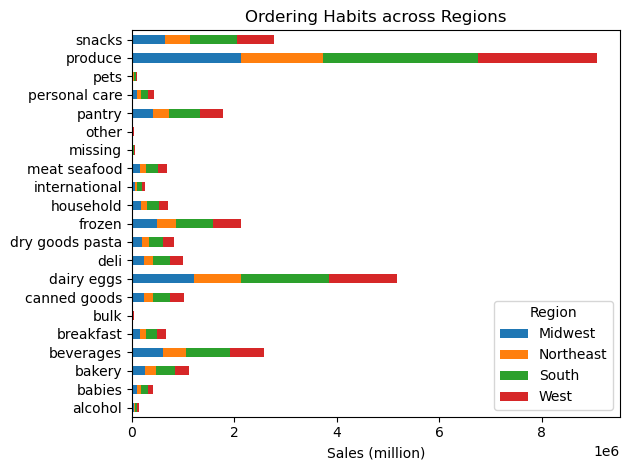

In [78]:
# 3. Regional Sales

dept_reg = pd.crosstab(df_merged['department'],df_merged['Region'],dropna = True)

StBar_Dept_Reg = dept_reg.plot.barh(stacked =True)

plt.title('Ordering Habits across Regions')
plt.ylabel(None)
plt.xlabel('Sales (million)')
plt.tight_layout()
plt.show()

StBar_Dept_Reg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'StBar_Department_Region.png'))